# Hierarchical Clustering(Agglomerative Clustering)

agglomerative: 병합

https://docs.google.com/presentation/d/1VIcIxR75bZ5NnBiq-LCJkr2q5B0lznuRCm3ji8iaoMY/edit?usp=sharing

### Intuition

Step1: 모든 data point를 하나의 cluster로 간주함 -> N개의 클러스터  
Step2: 가장 가까운 두 cluster를 하나의 cluster로 간주함 -> N-1개의 클러스터  
Step3: cluster가 1개가 될 때 까지 Step2 반복  

#### Linkage(Distance)
- ‘ward’: 기본. 클러스터 병합시 모든 클러스터의 분산을 가장 적게 증가시키는 두 클러스터 병합.
- ‘average’: 두 클러스터에서 각각의 클러스터 포인트들 끼리의 평균 거리가 가장 짧은 두 클러스터를 병합.
- ‘complete’: 두 클러스터에서 각각의 클러스터 포인트들 중 가장 거리가 긴 경우를 비교하여, 해당 거리가 가장 짧은 두 클러스터를 병합.
- ‘single’: 두 클러스터에서 각각의 클러스터 포인트들 중 가장 거리가 가까운 경우를 비교하여, 해당 거리가 가장 짧은 두 클러스터를 병합.

#### Number of Clusters
Use dendrogram.(Cophenetic Distance)  
각각의 가로선을 기준으로 distance를 측정했을 때 가장 값이 큰 distance가 있는 세로선을 확인한다. 그리고 그 세로선을 기준으로 클러수터 수를 정한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Example
Customer information

### Step1: Load Dataset

In [2]:
# 'Customers.csv' 파일 읽기 pd.read_csv()
# df shape 확인 

df = pd.read_csv("Customers.csv")
df.shape

(200, 5)

In [3]:
# df head 행 보기

df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# column별로 unique 종류 수 확인

df.nunique()

CustomerID       200
Gender             2
Age               51
AnnualIncome      64
SpendingScore     84
dtype: int64

In [5]:
# set index as 'CustomerID'

df.set_index('CustomerID', inplace=True)

In [6]:
# df descriptive statistics

df.describe()

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Step2: Visualize Dataset

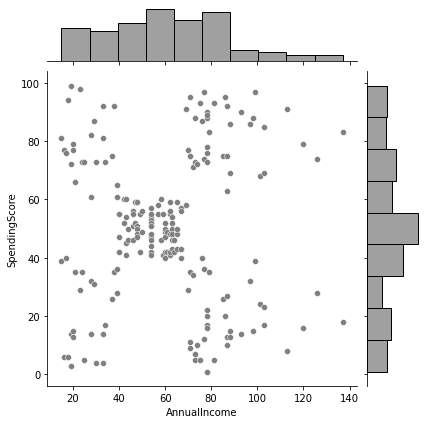

In [5]:
# sns.jointplot 활용한 시각화. x='AnnualIncome', y='SpendingScore'

sns.jointplot(x='AnnualIncome', y='SpendingScore', data = df, color = 'gray')

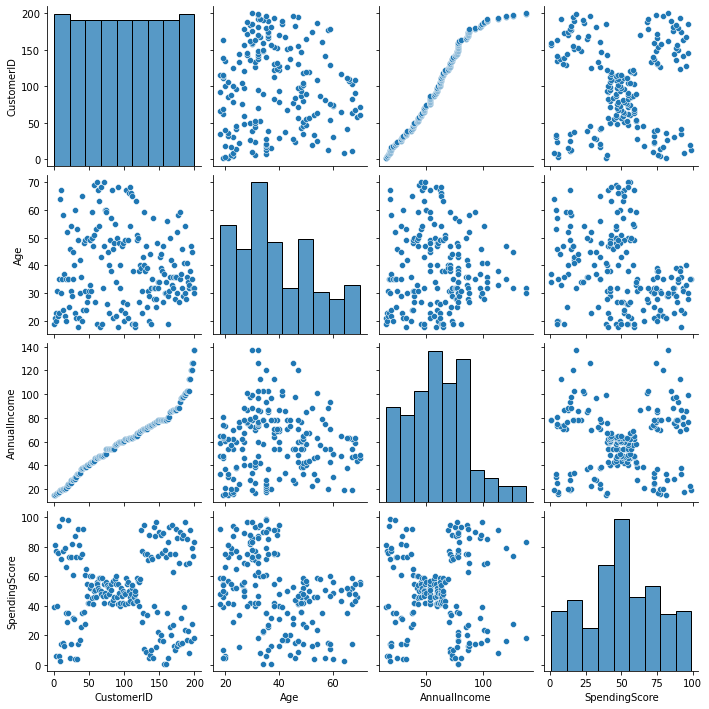

In [6]:
# sns.pairplot()

sns.pairplot(df)

### Step3: Find Optimal # of Clusters

In [8]:
# X에 -1번째 column까지 할당 np.array

X = df.iloc[:, 2:].values

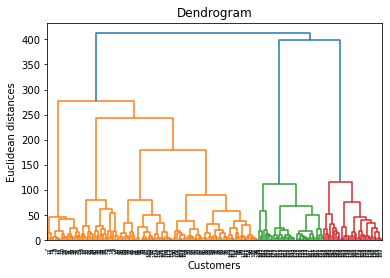

In [9]:
# from scipy.cluster import hierarchy
# dendrogram으로 원하는 cluster 수 찾기

from scipy.cluster import hierarchy
hc = hierarchy.linkage(X, method = 'ward')  # ward: minimum variance
dendrogram = hierarchy.dendrogram(hc)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
# check linkage
# The hierarchical clustering encoded as a linkage matrix. 
# linkage matrix: 
# column 1. index of a class
# column 2. index of other class
# column 3. distance between class
# column 4. sum of the numbers in a class and other class.()

hc[-5:]

array([[390.        , 391.        , 180.04068418,  83.        ],
       [389.        , 394.        , 243.9197281 , 106.        ],
       [378.        , 395.        , 277.42153431, 126.        ],
       [392.        , 393.        , 397.74740753,  74.        ],
       [396.        , 397.        , 411.91598459, 200.        ]])

In [11]:
# dendrogram으로 원하는 cluster 수 찾기
# dendrogram 에서 distance가 가장 크게 변화하는 cluster 수 찾기

first_distance = hc[:, 2][0]
subtraction_distance = []
for distance in hc[:, 2]:
    subtraction_distance.append(distance - first_distance)
    first_distance = distance
    
n_clusters = X.shape[0] - subtraction_distance.index(max(subtraction_distance))
n_clusters

3

### Step4: Train Model

In [13]:
# from sklearn.cluster import AgglomerativeClustering
# model: AgglomerativeClustering(), 
# param: n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
# y_hc에 predict 값 저장

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
model.fit(X)
y_hc = model.labels_

### Step5: Analyze Result

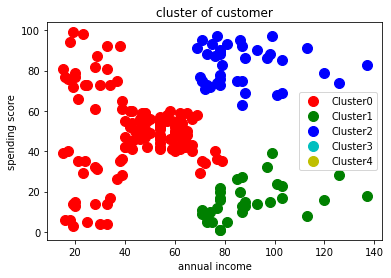

In [14]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='r', label='Cluster0')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='g', label='Cluster1')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='b', label='Cluster2')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='c', label='Cluster3')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='y', label='Cluster4')

plt.title('cluster of customer')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()


---

## Exercise

League of Legends character stats

reference. https://developer.riotgames.com/docs/lol#data-dragon_champions

### Step1: Load Dataset

In [15]:
# import requests
# url = 'http://ddragon.leagueoflegends.com/cdn/10.24.1/data/en_US/champion.json'
# requests.get 으로 값 불러오기

import requests

url = 'http://ddragon.leagueoflegends.com/cdn/10.24.1/data/en_US/champion.json'
resp = requests.get(url)
resp

<Response [200]>

In [16]:
# json 추출

resp_json = resp.json()
resp_json.keys()

dict_keys(['type', 'format', 'version', 'data'])

In [17]:
# 챔피언별로 data 파싱

list_stats = []
for k in resp_json['data'].keys():
    dict_stat = resp_json['data'][k]['stats']
    dict_stat['id'] = k
    list_stats.append(dict_stat)

In [18]:
# 챔피언별로 data 파싱

def data_parser(champ):
    dict_stat = resp_json['data'][champ]['stats']
    dict_stat['id'] = champ
    return dict_stat

list_stats = list(map(data_parser, resp_json['data']))

In [19]:
# 파싱된 값 df로 저장.

df = pd.DataFrame(list_stats)
df = df.set_index('id')
df.head()

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
id,,,,,,,,,,,,,,,,,,,,
Aatrox,580.0,90,0.0,0.0,345,38.00,3.25,32.1,1.25,175,3.0,1.00,0.000,0.000,0,0,60.00,5.00,2.500,0.651
Ahri,526.0,92,418.0,25.0,330,20.88,3.50,30.0,0.50,550,5.5,0.60,8.000,0.800,0,0,53.04,3.00,2.000,0.668
Akali,575.0,95,200.0,0.0,345,23.00,3.50,37.0,1.25,125,8.0,0.50,50.000,0.000,0,0,62.40,3.30,3.200,0.625
Alistar,600.0,106,350.0,40.0,330,44.00,3.50,32.1,1.25,125,8.5,0.85,8.500,0.800,0,0,62.00,3.75,2.125,0.625
Amumu,615.0,80,285.0,60.0,335,30.00,3.80,32.1,1.25,125,9.0,0.85,7.382,0.525,0,0,53.38,3.80,2.180,0.736


In [20]:
# 18level 값으로 처리

df['hp_18'] = df['hp'] + 17 * df['hpperlevel']
df['mp_18'] = df['mp'] + 17 * df['mpperlevel']
df['armor_18'] = df['armor'] + 17 * df['armorperlevel']
df['spellblock_18'] = df['spellblock'] + 17 * df['spellblockperlevel']
df['hpregen_18'] = df['hpregen'] + 17 * df['hpregenperlevel']
df['mpregen_18'] = df['mpregen'] + 17 * df['mpregenperlevel']
df['crit_18'] = df['crit'] + 17 * df['critperlevel']
df['attackdamage_18'] = df['attackdamage'] + 17 * df['attackdamageperlevel']
df['attackspeed_18'] = df['attackspeed'] * (1 + df['attackspeedperlevel'] * 17 / 100)
df['attackspeed_18'] = df['attackspeed_18'].apply(lambda x: round(x, 4))

df = df.drop(['hpperlevel', 'mpperlevel', 'armorperlevel', 'spellblockperlevel', 
              'hpregenperlevel', 'mpregenperlevel', 'critperlevel', 
              'attackdamageperlevel', 'attackspeedperlevel'], axis=1)
df = df.drop(['hp', 'mp', 'armor', 'spellblock', 'hpregen', 'mpregen', 
              'crit', 'attackdamage', 'attackspeed'], axis=1)

df.head()

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
id,,,,,,,,,,,
Aatrox,345,175,2110.0,0.0,93.25,53.35,20.00,0.000,0,145.00,0.9277
Ahri,330,550,2090.0,843.0,80.38,38.50,15.70,21.600,0,104.04,0.8951
Akali,345,125,2190.0,200.0,82.50,58.25,16.50,50.000,0,118.50,0.9650
Alistar,330,125,2402.0,1030.0,103.50,53.35,22.95,22.100,0,125.75,0.8508
Amumu,335,125,1975.0,1305.0,94.60,53.35,23.45,16.307,0,117.98,1.0088


### Step2: Visualize Dataset

In [21]:
# 가장 std가 큰 것 기준으로 jointplot 그리기 위한 확인 작업

df.describe().T.sort_values('std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
mp_18,152.0,941.531447,410.768370,0.000,843.0000,1008.6000,1200.0000,1879.0000
attackrange,152.0,326.677632,195.349020,125.000,125.0000,175.0000,525.0000,650.0000
hp_18,152.0,2070.256579,141.541546,1530.000,2016.0000,2077.0000,2142.2400,2480.0000
attackdamage_18,152.0,114.191126,14.354857,50.000,105.9440,114.0500,121.4025,153.0000
armor_18,152.0,88.672355,10.749716,28.000,81.4700,87.5000,95.6000,115.0000
mpregen_18,152.0,17.763447,9.151381,0.000,14.9810,19.0920,21.6000,50.0000
movespeed,152.0,336.203947,7.603013,315.000,330.0000,335.0000,340.0000,355.0000
spellblock_18,152.0,46.175658,7.589349,30.100,38.5000,49.2500,53.3500,61.7500
hpregen_18,152.0,17.892105,3.747379,11.000,14.8500,16.8000,20.3750,34.2500
attackspeed_18,152.0,0.920183,0.110327,0.625,0.8375,0.9227,1.0053,1.2625


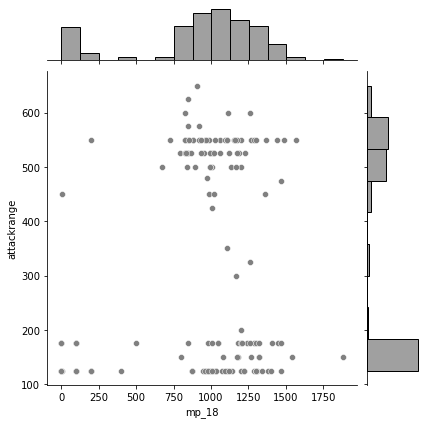

In [22]:
# sns.jointplot 활용한 시각화. x='mp_18', y='attackrange'

sns.jointplot(x='mp_18', y='attackrange', data = df, color = 'gray')

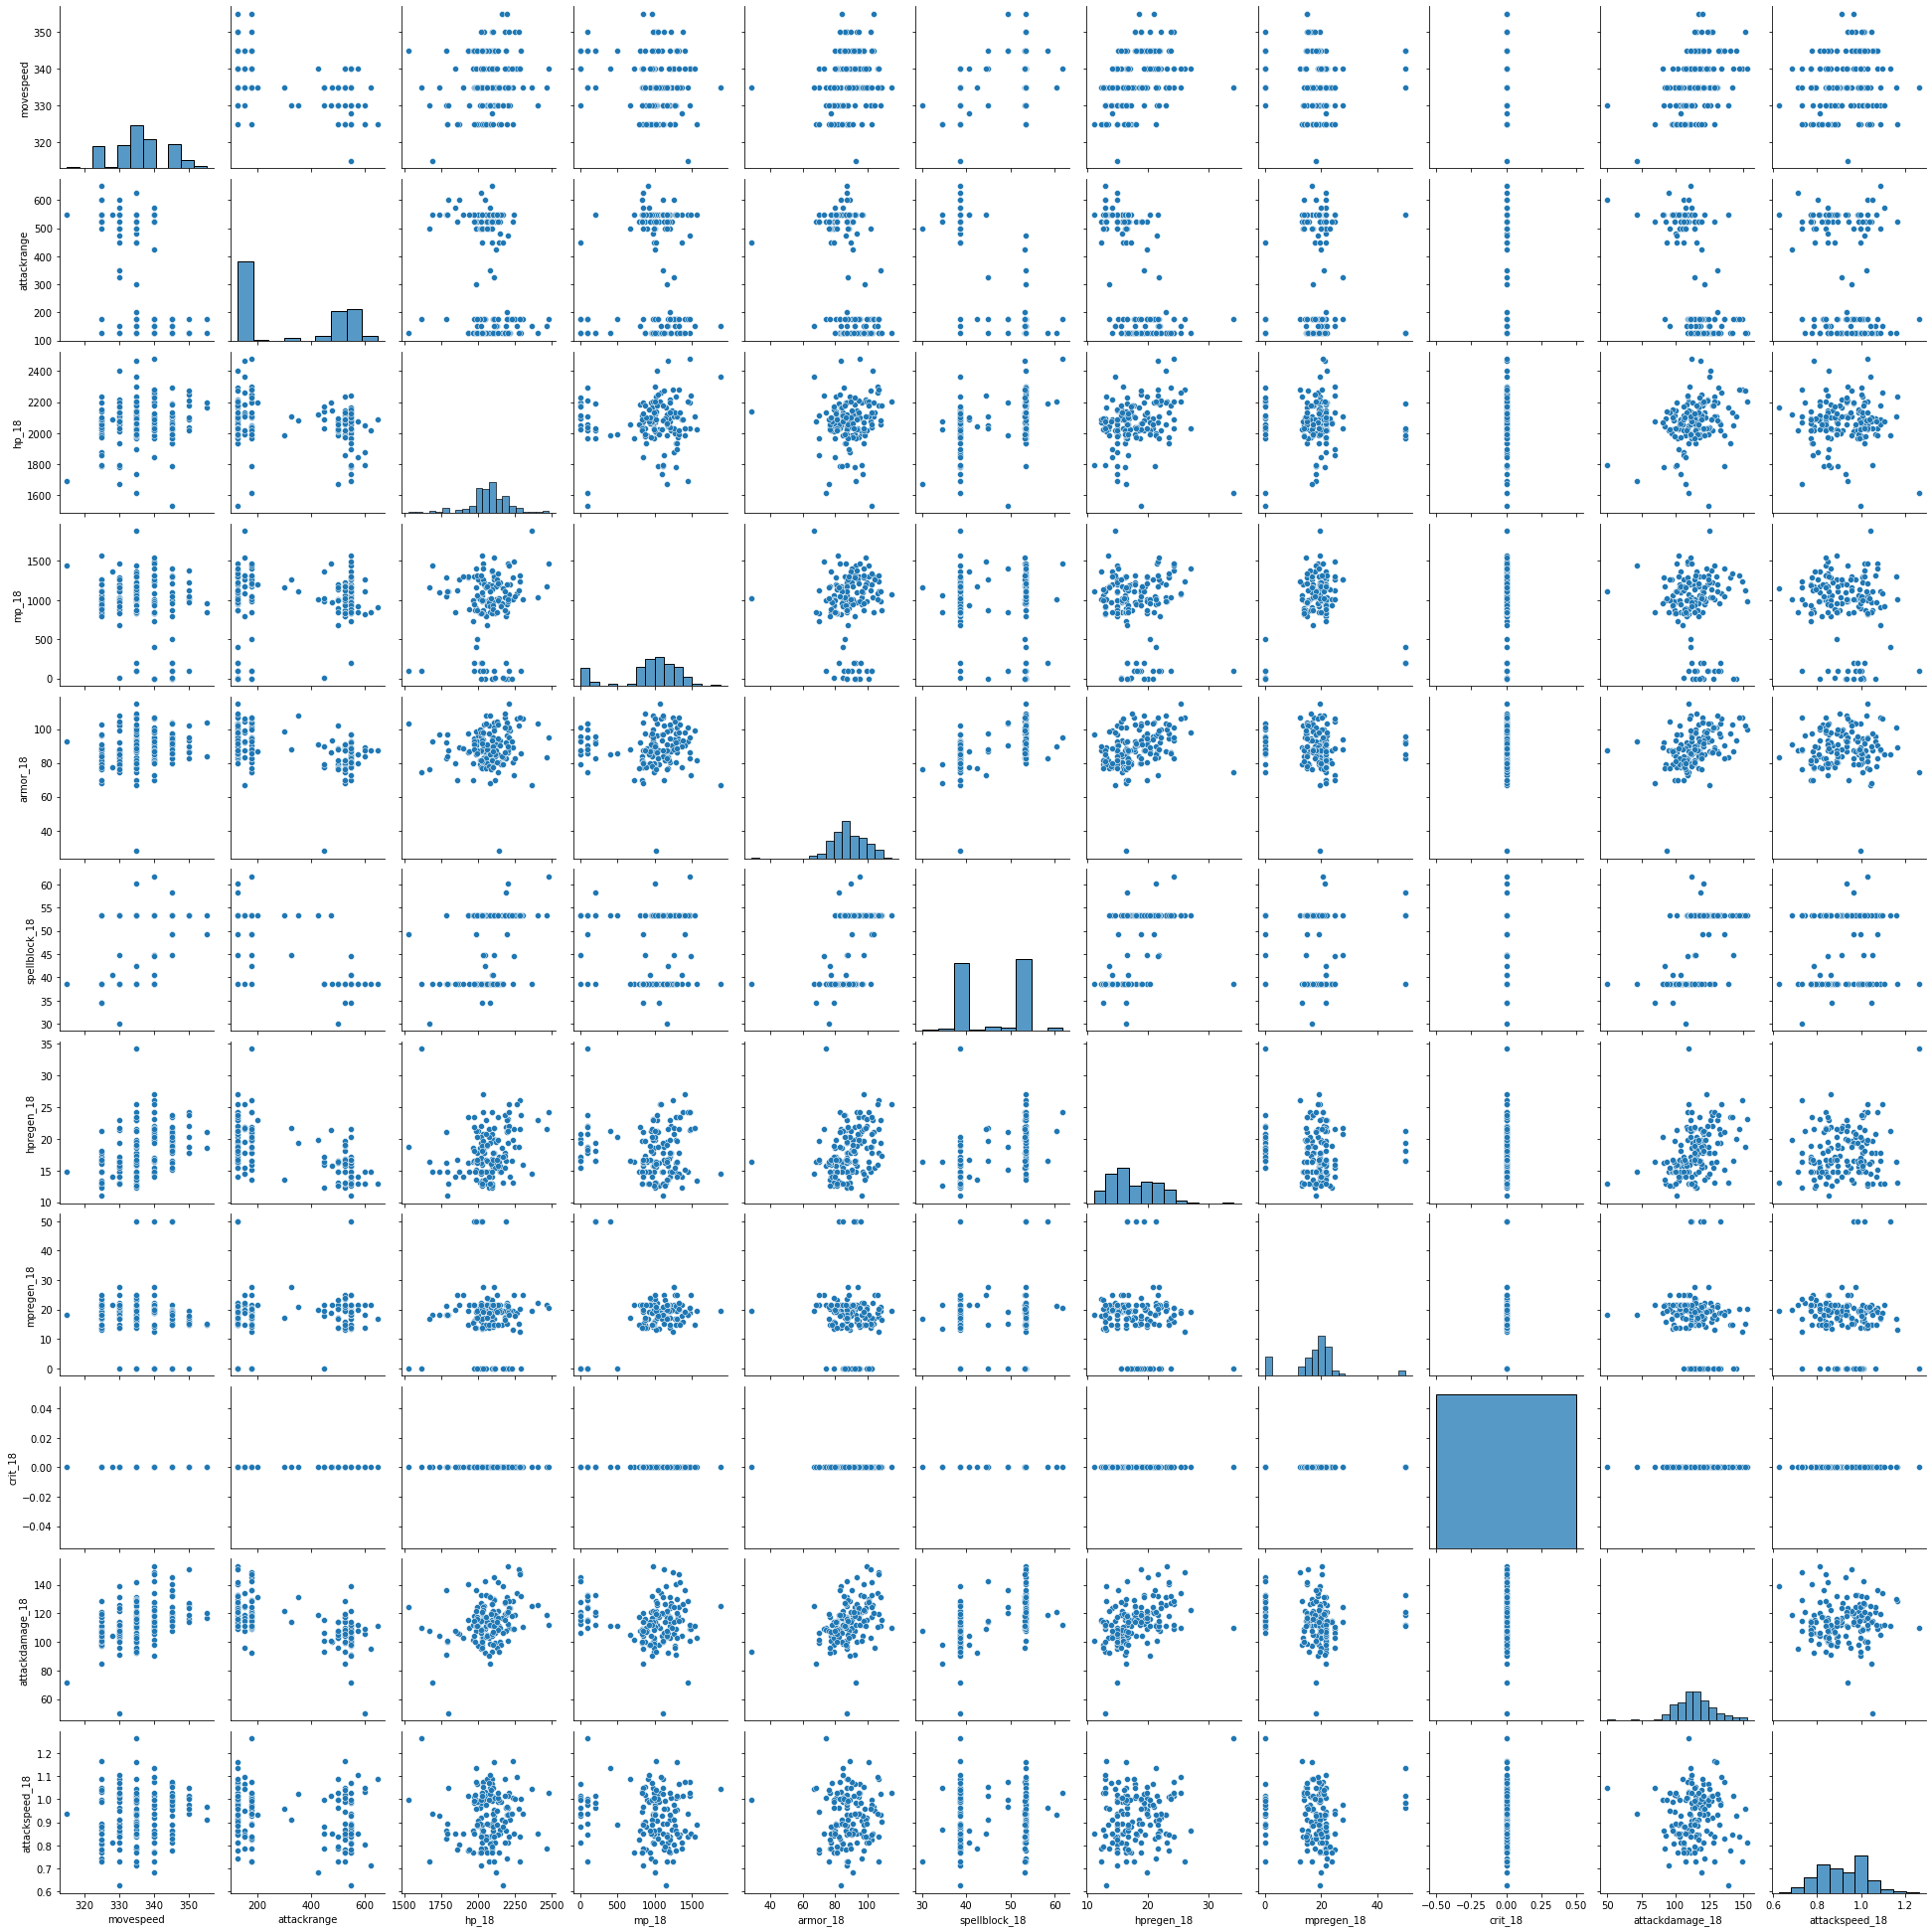

In [23]:
sns.pairplot(df)

### Step3: Find Optimal # of Clusters

In [24]:
# from sklearn.preprocessing import StandardScaler
# sc로 StandardScaler() 스케일러 오브젝트 할당
# 스케일링 할 X_train으로 fit

from sklearn.preprocessing import StandardScaler

X = df
transformer = StandardScaler().fit(X)

In [25]:
# X_pp에 스케일링 결과 저장

X_pp = transformer.transform(X)
X_pp

array([[ 1.16074116, -0.77901106,  0.28171802, ...,  0.        ,
         2.1533285 ,  0.06835999],
       [-0.81868281,  1.14697594,  0.13994964, ...,  0.        ,
        -0.70949389, -0.22810196],
       [ 1.16074116, -1.03580932,  0.84879155, ...,  0.        ,
         0.30116069,  0.40756339],
       ...,
       [-0.15887482,  1.14697594, -1.22102682, ...,  0.        ,
        -0.80734427, -0.62641587],
       [ 0.50093317,  1.14697594,  0.38095589, ...,  0.        ,
        -0.00636906, -0.26902462],
       [ 0.50093317,  1.27537507, -1.58253619, ...,  0.        ,
        -0.44837318, -0.64551311]])

In [26]:
# df_pp 스케일된 DataFrame 생성

df_pp = pd.DataFrame(X_pp, columns=df.columns, index=df.index)
df_pp.head()

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
id,,,,,,,,,,,
Aatrox,1.160741,-0.779011,0.281718,-2.299700,0.427246,0.948442,0.564358,-1.947484,0.0,2.153328,0.068360
Ahri,-0.818683,1.146976,0.139950,-0.240664,-0.773952,-1.014716,-0.586904,0.420618,0.0,-0.709494,-0.228102
Akali,1.160741,-1.035809,0.848792,-1.811198,-0.576086,1.596218,-0.372716,3.534234,0.0,0.301161,0.407563
Alistar,-0.818683,-1.035809,2.351536,0.216085,1.383912,0.948442,1.354177,0.475435,0.0,0.807886,-0.630963
Amumu,-0.158875,-1.035809,-0.675219,0.887776,0.553246,0.948442,1.488045,-0.159677,0.0,0.264816,0.805877


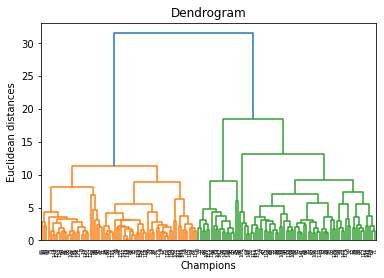

In [27]:
# dendrogram 
# n_clusters 찾기

from scipy.cluster import hierarchy
hc = hierarchy.linkage(df_pp, method = 'ward')  # ward: minimum variance
dendrogram = hierarchy.dendrogram(hc)
plt.title('Dendrogram')
plt.xlabel('Champions')
plt.ylabel('Euclidean distances')
plt.show()

In [28]:
# n_clusters 찾기. 
# dendrogram 에서 distance가 가장 크게 변화하는 cluster 수 찾기

first_distance = hc[:, 2][0]
subtraction_distance = []
for distance in hc[:, 2]:
    subtraction_distance.append(distance - first_distance)
    first_distance = distance
    
n_clusters = X.shape[0] - subtraction_distance.index(max(subtraction_distance))
n_clusters

2

### Step4: Train Model

In [29]:
# from sklearn.cluster import AgglomerativeClustering
# model: AgglomerativeClustering(), 
# param: n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
# y_hc에 predict 값 저장


from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
model.fit(X)
y_hc = model.labels_

### Step5: Analyze Result

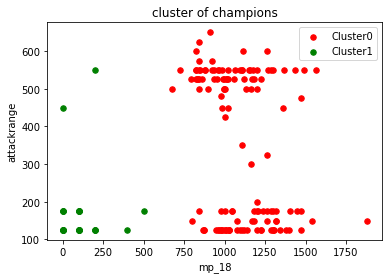

In [30]:
x_axis = 'mp_18'
y_axis = 'attackrange'

plt.scatter(df.loc[y_hc==0, x_axis], df.loc[y_hc==0, y_axis], s=30, c='r', label='Cluster0')
plt.scatter(df.loc[y_hc==1, x_axis], df.loc[y_hc==1, y_axis], s=30, c='g', label='Cluster1')
# plt.scatter(df.loc[y_hc==2, x_axis], df.loc[y_hc==2, y_axis], s=30, c='b', label='Cluster2')
# plt.scatter(df.loc[y_hc==3, x_axis], df.loc[y_hc==3, y_axis], s=30, c='c', label='Cluster3')
# plt.scatter(df.loc[y_hc==4, x_axis], df.loc[y_hc==4, y_axis], s=30, c='y', label='Cluster4')


plt.title('cluster of champions')
plt.legend()
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()


In [31]:
# 최초 데이터 df에 y_kmeans 결과 추가

df_result = df.copy()
df_result['cluster'] = y_hc
df_result.head()

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18,cluster
id,,,,,,,,,,,,
Aatrox,345,175,2110.0,0.0,93.25,53.35,20.00,0.000,0,145.00,0.9277,1
Ahri,330,550,2090.0,843.0,80.38,38.50,15.70,21.600,0,104.04,0.8951,0
Akali,345,125,2190.0,200.0,82.50,58.25,16.50,50.000,0,118.50,0.9650,1
Alistar,330,125,2402.0,1030.0,103.50,53.35,22.95,22.100,0,125.75,0.8508,0
Amumu,335,125,1975.0,1305.0,94.60,53.35,23.45,16.307,0,117.98,1.0088,0


In [32]:
# cluster별 해석

# 0: 마나 있음
df_result[df_result.cluster==0]

# 1: 마나 없음
df_result[df_result.cluster==1]

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18,cluster
id,,,,,,,,,,,,
Aatrox,345,175,2110.00,0.0,93.25,53.35,20.00,0.0,0,145.00,0.9277,1
Akali,345,125,2190.00,200.0,82.50,58.25,16.50,50.0,0,118.50,0.9650,1
DrMundo,345,125,2095.52,0.0,95.50,53.35,20.75,0.0,0,120.77,1.0642,1
Garen,340,175,2048.00,0.0,87.00,44.85,16.50,0.0,0,142.50,1.0128,1
Gnar,335,175,1615.00,100.0,74.50,38.50,34.25,0.0,0,110.00,1.2625,1
Katarina,340,125,2200.00,0.0,87.38,53.35,19.40,0.0,0,112.40,0.9645,1
Kennen,335,550,1969.00,200.0,92.75,38.50,16.55,50.0,0,111.75,0.9862,1
Kled,345,125,1530.00,100.0,103.00,49.25,18.75,0.0,0,124.50,0.9969,1
LeeSin,345,125,2020.00,200.0,95.90,53.35,19.40,50.0,0,132.90,0.9830,1
